# IMDB REVIEW CLASSIFIER USING WORD EMBEDDINGS(GloVe)

### Understanting The Problem
<p>In this problem, we have to classify the sentiment / emotion of th reviews provided to either be positive or negative. Here we are provided with a set of IMDB reviews and the sentiment of each review. We will be using word embedding(GloVe technique) to convert each word into a numerical vector and then use various classification models to predict the results.</p>

### Opinion Mining
<p>
Opinion mining, also known as sentiment analysis or emotion AI, is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.
</p>

### Dataset Description

The dataset in the form of text file can be downloaded form the following link.
https://drive.google.com/file/d/1zXOovxa6RSqmIOaFu9RNlluVlmyBfJ0M/view?usp=sharing

The given dataset has 748 IMDB reviews and 2 attributes: Reviews and Class.<br>

<h6>Attributes:</h6>
<ul type="disc">
    <li>Reviews: IMDB reviews</li>
    <li>Class:
        <ul type="circle">
            <li>1 : Positive Review</li>
            <li>0 : Negative Review</li>
        </ul>
    </li>
</ul>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

#### Loading the dataset

In [6]:
df=pd.read_csv(r'reviews.csv')
df.head()

,Reviews,Class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


 <h6>Loadong the dataset and displaying the first 5 rows from it using 'head()'.</h6>

In [7]:
df.describe(include='all')

,Reviews,Class
count,748,748.000000
unique,745,NaN
top,10/10,NaN
freq,2,NaN
mean,NaN,0.516043
std,NaN,0.500077
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
Reviews    748 non-null object
Class      748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [9]:
df.isnull().values.any()

False

 <h6>As there exist no null value so we do not have to deal with or handle any null value.</h6>

### Performing EDA(Exploratory Data Analysis)

Distribution of the Classes in the dataset
1    0.516043
0    0.483957
Name: Class, dtype: float64


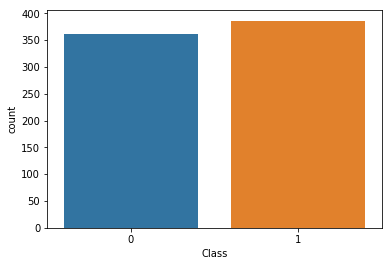

In [11]:
print('Distribution of the Classes in the dataset')
print(df['Class'].value_counts()/len(df))

sns.countplot(data=df,x='Class')

<h6>The ratio of negative reviews to the positive reviews is approximately 1. Therefore it can be said that there is not much difference in the no. of positive and no. of negative reviews.</h6>

#### WordCloud
<p>It is an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.</p>
<p>Before generating a wordcloud we will remove the stopword from the text data.<br>
<b><u>Stopwords</u></b> : These are the words that are are deemed irrelevant for searching / analysing purpose because they occur frequently in the language. So, in order to save both space and time, these words are dropped.</p>

In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [14]:
words=set(stopwords.words('english'))
def remove_stopword(x):
    lst=list()
    for i in x.lower().split(" "):
        if i in words:
            continue
        else:
            lst.append(i)
    return " ".join(lst)
df['Clean_Text']=df['Reviews'].apply(remove_stopword)

<h6>In the above code, we are removing all the stopwords using 'remove_stopword' function from each review.</h6>

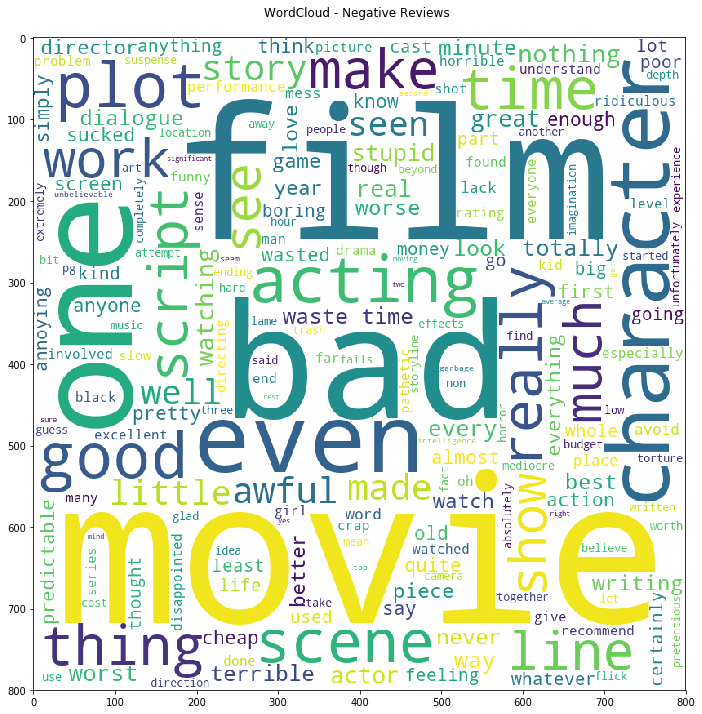

In [15]:
neg_words=df['Clean_Text'][df['Class']==0]
neg_word=" ".join(neg_words)
wordcloud=WordCloud(height=800,width=800,background_color='white').generate(neg_word)

plt.figure(figsize=(18,12))
plt.title("WordCloud - Negative Reviews \n")
plt.imshow(wordcloud)
plt.show()


<h6>The above code geneartes the wordcloud of all the negative reviews.</h6>

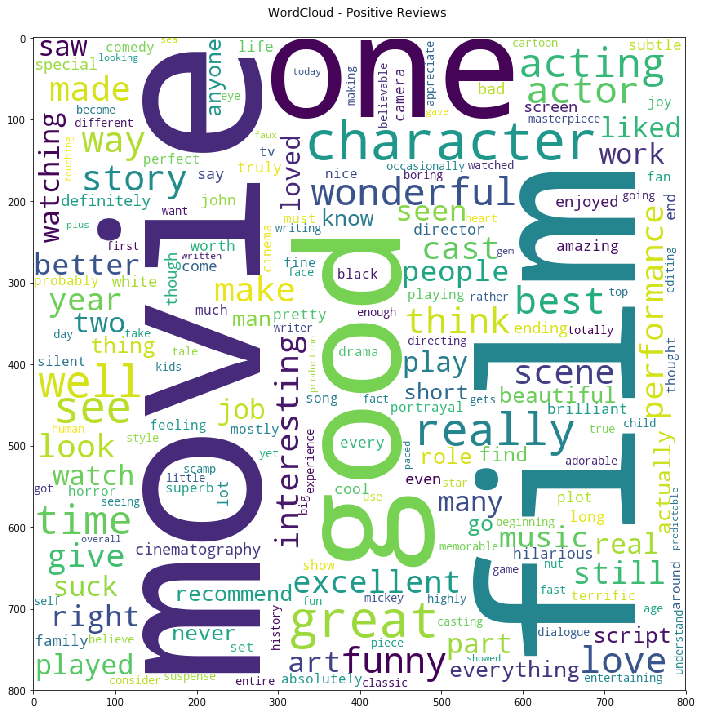

In [16]:
p_words=df['Clean_Text'][df['Class']==1]
p_word=" ".join(p_words)
wordcloud1=WordCloud(height=800,width=800,background_color='white').generate(p_word)

plt.figure(figsize=(18,12))
plt.title("WordCloud - Positive Reviews \n")
plt.imshow(wordcloud1)
plt.show()


<h6>The above code generates the wordcloud for all the positive reviews.</h6>

<h2>Word Embedding</h2>

<p>
Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.
In a laymans language, word embeddings are vector representations of a particular word.
Word2Vec is one of the most popular technique to learn word embeddings. It was developed by Tomas Mikolov in 2013 at Google.
This method was prediction based in the sense that it provided probabilities to the words and proved to be state of the art for tasks like word analogies and word similarities. It was also able to achieve tasks like King -man +woman = Queen, which was considered a result almost magical.
</p>
<p>
Here in this database we will be using GloVe vectors for the conversion of the text.
GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus. The resulting embeddings show interesting linear substructures of the word in vector space.
<img src="Glove_eg.png">
A simple example of what Glove vectors look like if ploted into a graph.
Any two vectors sharing a similar relation are almost parallel to eachother.
</p>

In [19]:
import gensim
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

C:\Users\HP\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [20]:
glove2word2vec(glove_input_file='glove.6B.50d.txt',word2vec_output_file="Vectors.txt")
model=KeyedVectors.load_word2vec_format("Vectors.txt")

We will use pre-trained word vectors in the project that is open sourced in the Stanford website.
https://nlp.stanford.edu/projects/glove/
You can download the word embedding with GloVe here:
http://nlp.stanford.edu/data/glove.6B.zip

Here we are using the text file 'glove.6B.50d.txt'. Each line has space separated word and its corresponding embeddings of 50 dimension .

We will use 2 methods for the sentiment classification:
<ul>
    <li><b>Unweighted Sentence Vectors: Sentence vector(S)[50-dim]= (word_vector(w1)+word_vector(w2)+word_vector(w3))</b></li>
    <li><b>Normalized sentence vectors: Sentence vector normalized(S)[50-dim]=(word_vector(w1)+word_vector(w2)+word_vector(w3))/ (number of words)</b></li>
</ul>

In [21]:
Def_List=[0]*50
def Get_Sum(x,Def_List,ret_val):
    vec=Def_List
    for i in x:
        try:
            vec=np.add(vec,model[i])
        except:
            vec=np.add(vec,Def_List)
            continue
    return vec[ret_val]

unwt_vec=df
for i in range(50):
    unwt_vec['Feature'+str(i)]=unwt_vec['Clean_Text'].apply(Get_Sum,args=[Def_List,i])
unwt_vec

,Reviews,Class,Clean_Text,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49
0,"A very, very, very slow-moving, aimless movie ...",0,"very, very, slow-moving, aimless movie distres...",-3.147580,55.054070,35.304609,43.283680,15.512096,-0.576338,23.835820,...,45.955755,9.342658,-2.609285,-12.081583,-7.198014,23.413654,8.325245,-31.560435,16.858541,57.218520
1,Not sure who was more lost - the flat characte...,0,"sure lost - flat characters audience, nearly h...",-4.339941,39.864810,33.493761,37.196850,16.649266,2.702068,16.853090,...,39.579793,9.138292,-12.954365,-3.565787,-3.513915,15.263419,9.764361,-15.799705,16.231830,50.392911
2,Attempting artiness with black & white and cle...,0,attempting artiness black & white clever camer...,-7.232397,103.757171,81.980295,82.588971,44.748976,-1.905478,39.965240,...,99.094876,12.919981,-23.357448,-0.395946,-5.176439,38.732658,23.816379,-51.255765,46.230211,102.525621
3,Very little music or anything to speak of.,0,little music anything speak of.,-2.905241,21.723330,18.210816,17.232200,13.390500,-2.043094,10.641510,...,18.652663,-1.712401,-4.709729,-0.177523,-3.421085,4.424772,5.618034,-10.497698,9.231130,21.872620
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,-1.987123,44.036340,36.627725,37.216980,16.298460,0.390551,25.426430,...,42.671819,7.053448,-10.196040,-4.496683,-8.286419,19.506372,10.326536,-23.713982,15.609057,58.496021
5,"The rest of the movie lacks art, charm, meanin...",0,"rest movie lacks art, charm, meaning... emptin...",-4.325489,50.504990,41.207369,42.969840,23.969276,1.587795,19.084090,...,41.624616,4.672823,-6.009157,-1.764799,-7.724439,15.274791,11.531861,-24.583027,17.254985,45.676411
6,Wasted two hours.,0,wasted two hours.,-2.771752,13.583410,10.317590,12.448310,3.458022,-0.927016,5.611510,...,12.267286,1.314681,-2.846480,-1.726785,0.550046,4.672023,1.521312,-6.482656,5.953987,14.152370
7,Saw the movie today and thought it was a good ...,1,"saw movie today thought good effort, good mess...",-4.130097,44.403860,27.412232,37.255250,13.813386,-2.530845,19.101490,...,37.422145,3.672922,-3.665087,-9.097407,-1.464975,13.431522,6.952095,-23.091311,18.024414,47.208630
8,A bit predictable.,0,bit predictable.,-0.692560,8.456380,8.106114,8.757740,5.655800,2.299944,2.358680,...,10.509388,2.909401,-3.316553,1.802952,0.047805,6.202280,2.383027,-5.545642,4.474929,14.401720
9,Loved the casting of Jimmy Buffet as the scien...,1,loved casting jimmy buffet science teacher.,-2.839451,29.446630,24.779769,26.721320,13.302030,-3.560957,14.621080,...,33.195133,3.730676,-2.678092,-1.221563,-4.894443,13.589973,7.282146,-17.149308,11.214210,34.448670


<h6>Using the above code, we have created a dataframe 'unwt_vec' which contains the unweighted sentence vector for each review present in the dataset</h6>

In [22]:
Def_List=[0]*50
def Get_Sum(x,Def_List,ret_val):
    vec=Def_List
    for i in x:
        try:
            vec=np.add(vec,model[i])
        except:
            vec=np.add(vec,Def_List)
            continue
    vec=np.divide(vec,len(vec))
    return vec[ret_val]

normal_vec=df
for i in range(50):
    normal_vec['Feature'+str(i)]=normal_vec['Clean_Text'].apply(Get_Sum,args=[Def_List,i])
normal_vec

,Reviews,Class,Clean_Text,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49
0,"A very, very, very slow-moving, aimless movie ...",0,"very, very, slow-moving, aimless movie distres...",-0.062952,1.101081,0.706092,0.865674,0.310242,-0.011527,0.476716,...,0.919115,0.186853,-0.052186,-0.241632,-0.143960,0.468273,0.166505,-0.631209,0.337171,1.144370
1,Not sure who was more lost - the flat characte...,0,"sure lost - flat characters audience, nearly h...",-0.086799,0.797296,0.669875,0.743937,0.332985,0.054041,0.337062,...,0.791596,0.182766,-0.259087,-0.071316,-0.070278,0.305268,0.195287,-0.315994,0.324637,1.007858
2,Attempting artiness with black & white and cle...,0,attempting artiness black & white clever camer...,-0.144648,2.075143,1.639606,1.651779,0.894980,-0.038110,0.799305,...,1.981898,0.258400,-0.467149,-0.007919,-0.103529,0.774653,0.476328,-1.025115,0.924604,2.050512
3,Very little music or anything to speak of.,0,little music anything speak of.,-0.058105,0.434467,0.364216,0.344644,0.267810,-0.040862,0.212830,...,0.373053,-0.034248,-0.094195,-0.003550,-0.068422,0.088495,0.112361,-0.209954,0.184623,0.437452
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,-0.039742,0.880727,0.732555,0.744340,0.325969,0.007811,0.508529,...,0.853436,0.141069,-0.203921,-0.089934,-0.165728,0.390127,0.206531,-0.474280,0.312181,1.169920
5,"The rest of the movie lacks art, charm, meanin...",0,"rest movie lacks art, charm, meaning... emptin...",-0.086510,1.010100,0.824147,0.859397,0.479386,0.031756,0.381682,...,0.832492,0.093456,-0.120183,-0.035296,-0.154489,0.305496,0.230637,-0.491661,0.345100,0.913528
6,Wasted two hours.,0,wasted two hours.,-0.055435,0.271668,0.206352,0.248966,0.069160,-0.018540,0.112230,...,0.245346,0.026294,-0.056930,-0.034536,0.011001,0.093440,0.030426,-0.129653,0.119080,0.283047
7,Saw the movie today and thought it was a good ...,1,"saw movie today thought good effort, good mess...",-0.082602,0.888077,0.548245,0.745105,0.276268,-0.050617,0.382030,...,0.748443,0.073458,-0.073302,-0.181948,-0.029300,0.268630,0.139042,-0.461826,0.360488,0.944173
8,A bit predictable.,0,bit predictable.,-0.013851,0.169128,0.162122,0.175155,0.113116,0.045999,0.047174,...,0.210188,0.058188,-0.066331,0.036059,0.000956,0.124046,0.047661,-0.110913,0.089499,0.288034
9,Loved the casting of Jimmy Buffet as the scien...,1,loved casting jimmy buffet science teacher.,-0.056789,0.588933,0.495595,0.534426,0.266041,-0.071219,0.292422,...,0.663903,0.074614,-0.053562,-0.024431,-0.097889,0.271799,0.145643,-0.342986,0.224284,0.688973


<h6>Using the above code, we have created a dataframe 'normal_vec' which contains the normalized sentence vector for each review present in the dataset</h6>

### Preprocessing the Data

In [23]:
normal_vec=normal_vec.drop(columns='Reviews')
normal_vec=normal_vec.drop(columns='Clean_Text')
unwt_vec=unwt_vec.drop(columns='Reviews')
unwt_vec=unwt_vec.drop(columns='Clean_Text')

In [24]:
y_norm_vec=normal_vec['Class']
y_unwt_vec=unwt_vec['Class']

x_norm_vec=normal_vec.drop(columns='Class')
x_unwt_vec=unwt_vec.drop(columns='Class')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train_unwt,X_test_unwt,y_train_unwt,y_test_unwt=train_test_split(x_unwt_vec,y_unwt_vec, test_size=0.25, random_state=0)

In [27]:
X_train_norm,X_test_norm,y_train_norm,y_test_norm=train_test_split(x_norm_vec,y_norm_vec, test_size=0.25, random_state=0)

## Data Modeling( Unweighted Sentence Vectors)

### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_clf=LogisticRegression()
lr_clf.fit(X_train_unwt,y_train_unwt)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
lr_pred=lr_clf.predict(X_test_unwt)

In [31]:
print("Accuracy Score: ",metrics.accuracy_score(lr_pred,y_test_unwt))
print("F1 Score: ",f1_score(lr_pred,y_test_unwt))
print("Confusion Matrix:\n",confusion_matrix(lr_pred,y_test_unwt))
print("Classification Report:\n",classification_report(lr_pred,y_test_unwt))

Accuracy Score:  0.5668449197860963
F1 Score:  0.6301369863013699
Confusion Matrix:
 [[37 18]
 [63 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.67      0.48        55
           1       0.79      0.52      0.63       132

   micro avg       0.57      0.57      0.57       187
   macro avg       0.58      0.60      0.55       187
weighted avg       0.67      0.57      0.59       187



### 2.SVM(Support Vector Machine)

In [32]:
from sklearn.svm import SVC

In [33]:
svm_clf=SVC()
svm_clf.fit(X_train_unwt,y_train_unwt)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
svm_pred=svm_clf.predict(X_test_unwt)

In [35]:
print("Accuracy Score: ",metrics.accuracy_score(svm_pred,y_test_unwt))
print("F1 Score: ",f1_score(svm_pred,y_test_unwt))
print("Confusion Matrix:\n",confusion_matrix(svm_pred,y_test_unwt))
print("Classification Report:\n",classification_report(svm_pred,y_test_unwt))

Accuracy Score:  0.5240641711229946
F1 Score:  0.538860103626943
Confusion Matrix:
 [[46 35]
 [54 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.57      0.51        81
           1       0.60      0.49      0.54       106

   micro avg       0.52      0.52      0.52       187
   macro avg       0.53      0.53      0.52       187
weighted avg       0.54      0.52      0.53       187



### 3. Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
gnb_clf=GaussianNB()
gnb_clf.fit(X_train_unwt,y_train_unwt)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
gnb_pred=gnb_clf.predict(X_test_unwt)

In [39]:
print("Accuracy Score: ",metrics.accuracy_score(gnb_pred,y_test_unwt))
print("F1 Score: ",f1_score(gnb_pred,y_test_unwt))
print("Confusion Matrix:\n",confusion_matrix(gnb_pred,y_test_unwt))
print("Classification Report:\n",classification_report(gnb_pred,y_test_unwt))

Accuracy Score:  0.47058823529411764
F1 Score:  0.6319702602230484
Confusion Matrix:
 [[ 3  2]
 [97 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.60      0.06         5
           1       0.98      0.47      0.63       182

   micro avg       0.47      0.47      0.47       187
   macro avg       0.50      0.53      0.34       187
weighted avg       0.95      0.47      0.62       187



### 4. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_clf=DecisionTreeClassifier(criterion='gini')
dt_clf.fit(X_train_unwt,y_train_unwt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dt_pred=dt_clf.predict(X_test_unwt)

In [43]:
print("Accuracy Score: ",metrics.accuracy_score(dt_pred,y_test_unwt))
print("F1 Score: ",f1_score(dt_pred,y_test_unwt))
print("Confusion Matrix:\n",confusion_matrix(dt_pred,y_test_unwt))
print("Classification Report:\n",classification_report(dt_pred,y_test_unwt))

Accuracy Score:  0.48663101604278075
F1 Score:  0.4893617021276596
Confusion Matrix:
 [[45 41]
 [55 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.52      0.48        86
           1       0.53      0.46      0.49       101

   micro avg       0.49      0.49      0.49       187
   macro avg       0.49      0.49      0.49       187
weighted avg       0.49      0.49      0.49       187



### 5. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_clf=RandomForestClassifier(criterion='gini')
rf_clf.fit(X_train_unwt,y_train_unwt)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rf_pred=rf_clf.predict(X_test_unwt)

In [47]:
print("Accuracy Score: ",metrics.accuracy_score(rf_pred,y_test_unwt))
print("F1 Score: ",f1_score(rf_pred,y_test_unwt))
print("Confusion Matrix:\n",confusion_matrix(rf_pred,y_test_unwt))
print("Classification Report:\n",classification_report(rf_pred,y_test_unwt))

Accuracy Score:  0.47058823529411764
F1 Score:  0.43428571428571433
Confusion Matrix:
 [[50 49]
 [50 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50        99
           1       0.44      0.43      0.43        88

   micro avg       0.47      0.47      0.47       187
   macro avg       0.47      0.47      0.47       187
weighted avg       0.47      0.47      0.47       187



### 6. Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gb_clf=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
gb_clf.fit(X_train_unwt,y_train_unwt)

      Iter       Train Loss   Remaining Time 
         1           1.3620            4.68s
         2           1.3439            2.36s
         3           1.3274            1.58s
         4           1.3093            1.18s
         5           1.2945            0.95s
         6           1.2806            0.78s
         7           1.2582            0.66s
         8           1.2420            0.57s
         9           1.2268            0.49s
        10           1.2127            0.43s
        20           1.1140            0.13s
        30           1.0353            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [50]:
gb_pred=gb_clf.predict(X_test_unwt)

In [51]:
print("Accuracy Score: ",metrics.accuracy_score(gb_pred,y_test_unwt))
print("F1 Score: ",f1_score(gb_pred,y_test_unwt))
print("Confusion Matrix:\n",confusion_matrix(gb_pred,y_test_unwt))
print("Classification Report:\n",classification_report(gb_pred,y_test_unwt))

Accuracy Score:  0.5561497326203209
F1 Score:  0.5654450261780105
Confusion Matrix:
 [[50 33]
 [50 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        83
           1       0.62      0.52      0.57       104

   micro avg       0.56      0.56      0.56       187
   macro avg       0.56      0.56      0.56       187
weighted avg       0.57      0.56      0.56       187



## Data Modeling(Normalized Vectors)

### 1. Logistic Regression

In [52]:
lr_clf1=LogisticRegression()
lr_clf1.fit(X_train_norm,y_train_norm)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
lr_pred1=lr_clf1.predict(X_test_norm)

In [54]:
print("Accuracy Score: ",metrics.accuracy_score(lr_pred1,y_test_norm))
print("F1 Score: ",f1_score(lr_pred1,y_test_norm))
print("Confusion Matrix:\n",confusion_matrix(lr_pred1,y_test_norm))
print("Classification Report:\n",classification_report(lr_pred1,y_test_norm))

Accuracy Score:  0.5668449197860963
F1 Score:  0.6301369863013699
Confusion Matrix:
 [[37 18]
 [63 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.67      0.48        55
           1       0.79      0.52      0.63       132

   micro avg       0.57      0.57      0.57       187
   macro avg       0.58      0.60      0.55       187
weighted avg       0.67      0.57      0.59       187



### 2. SVM

In [55]:
svm_clf1=SVC()
svm_clf1.fit(X_train_norm,y_train_norm)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
svm_pred1=svm_clf1.predict(X_test_norm)

In [57]:
print("Accuracy Score: ",metrics.accuracy_score(svm_pred1,y_test_norm))
print("F1 Score: ",f1_score(svm_pred1,y_test_norm))
print("Confusion Matrix:\n",confusion_matrix(svm_pred1,y_test_norm))
print("Classification Report:\n",classification_report(svm_pred1,y_test_norm))

Accuracy Score:  0.5240641711229946
F1 Score:  0.538860103626943
Confusion Matrix:
 [[46 35]
 [54 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.57      0.51        81
           1       0.60      0.49      0.54       106

   micro avg       0.52      0.52      0.52       187
   macro avg       0.53      0.53      0.52       187
weighted avg       0.54      0.52      0.53       187



### 3. Naive Bayes

In [58]:
gnb_clf1=GaussianNB()
gnb_clf1.fit(X_train_norm,y_train_norm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
gnb_pred1=gnb_clf1.predict(X_test_norm)

In [60]:
print("Accuracy Score: ",metrics.accuracy_score(gnb_pred1,y_test_norm))
print("F1 Score: ",f1_score(gnb_pred1,y_test_norm))
print("Confusion Matrix:\n",confusion_matrix(gnb_pred1,y_test_norm))
print("Classification Report:\n",classification_report(gnb_pred1,y_test_norm))

Accuracy Score:  0.47058823529411764
F1 Score:  0.6319702602230484
Confusion Matrix:
 [[ 3  2]
 [97 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.60      0.06         5
           1       0.98      0.47      0.63       182

   micro avg       0.47      0.47      0.47       187
   macro avg       0.50      0.53      0.34       187
weighted avg       0.95      0.47      0.62       187



### 4. Decision Tree

In [61]:
dt_clf1=DecisionTreeClassifier(criterion='gini')
dt_clf1.fit(X_train_norm,y_train_norm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
dt_pred1=dt_clf1.predict(X_test_norm)

In [63]:
print("Accuracy Score: ",metrics.accuracy_score(dt_pred1,y_test_norm))
print("F1 Score: ",f1_score(dt_pred1,y_test_norm))
print("Confusion Matrix:\n",confusion_matrix(dt_pred1,y_test_norm))
print("Classification Report:\n",classification_report(dt_pred1,y_test_norm))

Accuracy Score:  0.5026737967914439
F1 Score:  0.502673796791444
Confusion Matrix:
 [[47 40]
 [53 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.50        87
           1       0.54      0.47      0.50       100

   micro avg       0.50      0.50      0.50       187
   macro avg       0.51      0.51      0.50       187
weighted avg       0.51      0.50      0.50       187



### 5. Random Forest

In [64]:
rf_clf1=RandomForestClassifier(criterion='gini')
rf_clf1.fit(X_train_norm,y_train_norm)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
rf_pred1=rf_clf1.predict(X_test_norm)

In [66]:
print("Accuracy Score: ",metrics.accuracy_score(rf_pred1,y_test_norm))
print("F1 Score: ",f1_score(rf_pred1,y_test_norm))
print("Confusion Matrix:\n",confusion_matrix(rf_pred1,y_test_norm))
print("Classification Report:\n",classification_report(rf_pred1,y_test_norm))

Accuracy Score:  0.5026737967914439
F1 Score:  0.4076433121019109
Confusion Matrix:
 [[62 55]
 [38 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57       117
           1       0.37      0.46      0.41        70

   micro avg       0.50      0.50      0.50       187
   macro avg       0.49      0.49      0.49       187
weighted avg       0.53      0.50      0.51       187



### 6. Gradient Boosting

In [67]:
gb_clf1=GradientBoostingClassifier(n_estimators=30,random_state=7,verbose=1)
gb_clf1.fit(X_train_norm,y_train_norm)

      Iter       Train Loss   Remaining Time 
         1           1.3620            0.12s
         2           1.3439            0.13s
         3           1.3274            0.13s
         4           1.3093            0.12s
         5           1.2945            0.12s
         6           1.2806            0.12s
         7           1.2582            0.11s
         8           1.2420            0.10s
         9           1.2268            0.09s
        10           1.2127            0.09s
        20           1.1140            0.04s
        30           1.0353            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [68]:
gb_pred1=gb_clf1.predict(X_test_norm)

In [69]:
print("Accuracy Score: ",metrics.accuracy_score(gb_pred1,y_test_norm))
print("F1 Score: ",f1_score(gb_pred1,y_test_norm))
print("Confusion Matrix:\n",confusion_matrix(gb_pred1,y_test_norm))
print("Classification Report:\n",classification_report(gb_pred1,y_test_norm))

Accuracy Score:  0.5561497326203209
F1 Score:  0.5654450261780105
Confusion Matrix:
 [[50 33]
 [50 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        83
           1       0.62      0.52      0.57       104

   micro avg       0.56      0.56      0.56       187
   macro avg       0.56      0.56      0.56       187
weighted avg       0.57      0.56      0.56       187



## Accuracy score and scores of other precision metrics after performing various models

<h3>Unweighted Sentence Vectors</h3>
<table border="2px">
    <tr>
        <th>Models</th>
        <th>Accuracy Score</th>
        <th>F1-Score</th>
    </tr>
    <tr>
        <th>Logistic Regression</th>
        <th>0.5668</th>
        <th>0.6301</th>
    </tr>
    <tr>
        <th>SVM</th>
        <th>0.5240</th>
        <th>0.5388</th>
    </tr>
    <tr>
        <th>Naive Bayes</th>
        <th>0.4705</th>
        <th>0.6319</th>
    </tr>
    <tr>
        <th>Decision Tree</th>
        <th>0.5080</th>
        <th>0.4999</th>
    </tr>
    <tr>
        <th>Random Forest</th>
        <th>0.5240</th>
        <th>0.4539</th>
    </tr>
    <tr>
        <th>Gradient Boosting</th>
        <th>0.5561</th>
        <th>0.5654</th>
    </tr>
</table>
<h3>Normalized Sentence Vectors</h3>
<table border="2px">
    <tr>
        <th>Models</th>
        <th>Accuracy Score</th>
        <th>F1-Score</th>
    </tr>
    <tr>
        <th>Logistic Regression</th>
        <th>0.5668</th>
        <th>0.6301</th>
    </tr>
    <tr>
        <th>SVM</th>
        <th>0.5240</th>
        <th>0.5388</th>
    </tr>
    <tr>
        <th>Naive Bayes</th>
        <th>0.4705</th>
        <th>0.6319</th>
    </tr>
    <tr>
        <th>Decision Tree</th>
        <th>0.5080</th>
        <th>0.4999</th>
    </tr>
    <tr>
        <th>Random Forest</th>
        <th>0.5240</th>
        <th>0.4539</th>
    </tr>
    <tr>
        <th>Gradient Boosting</th>
        <th>0.5561</th>
        <th>0.5654</th>
    </tr>
</table>

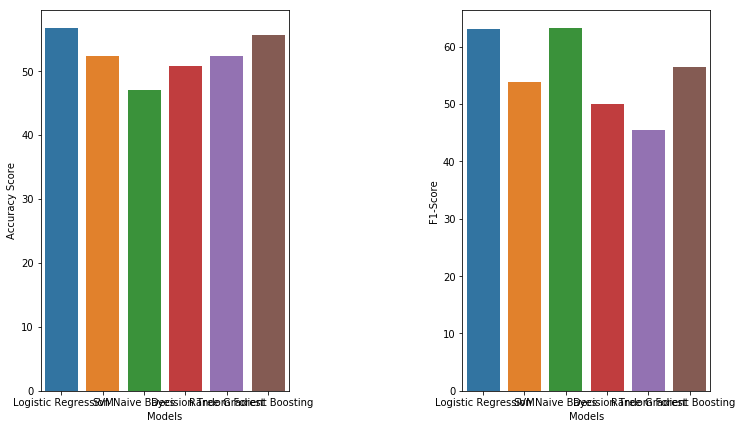

In [75]:
Data=pd.DataFrame({
    'Models': ['Logistic Regression','SVM','Naive Bayes','Decision Tree','Random Forest','Gradient Boosting'],
    'Accuracy Score': [56.68,52.40,47.05,50.80,52.40,55.61],
    'F1-Score': [63.01,53.88,63.19,49.99,45.39,56.54]
})
plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace=0.4,wspace=0.7)
plt.subplot(121)
sns.barplot(data=Data,x='Models',y="Accuracy Score")
plt.subplot(122)
sns.barplot(data=Data,x='Models',y="F1-Score")
plt.show()

### Conclusion
<h4>'Logistic Regression' gave the best accuracy of '56.68%' in case of both unweighted sentence vector and normalized sentence vector.</h4>

References:
<ul>
    <li>https://searchmicroservices.techtarget.com/definition/stop-word</li>
    <li>https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa</li>
    <li>https://medium.com/@japneet121/word-vectorization-using-glove-76919685ee0b</li>
</ul>